# Playing with the visits table 

### Alex Lu | Spring Q 17-18  
---

5/30/2018

**OBJECTIVE**

---

I have been tasked with getting distributions of age, sex, for Arbor and PFC patients over the last year. This notebook examines the age and sex distributions from a visits paradigm (and not a unique'd patients paradigm). 

First, let's import all of the stuff that we'll need

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from utils.indicator import *
from utils.file_ops import *
from datetime import datetime
%matplotlib inline

We want to filter on the time of visit for longitudinal visualization. First, we should do a conversion on the format of the time string to make it more workable. Then, we're going to make this new 'ts' column the index, and drop the string form VisitDate series. 

In [4]:
def time_filter(t1, t2, df):
    # accepts numerical tuples of form (year, mon, day)
    bound1 = datetime(*t1)
    bound2 = datetime(*t2)
    return df[bound1:bound2]

In [85]:
path_visits = "data/visits_with_gender.csv"
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits.head()

,VisitId,LocationAbbreviation,PatientId,MRN,Age(Year),VisitType,DateFirstKnown,VisitDateTime,Sex
0,16605,PFC,5244,NaN,52,PFC FAST TRACK,3/12/2016 10:53:40 AM,6/3/2017 9:00:00 AM,U
1,16604,PFC,5619,NaN,37,PFC MENTAL HEALTH VISIT,9/10/2016 11:31:38 AM,6/3/2017 9:30:00 AM,F
2,16610,PFC,5982,NaN,54,PFC NEW PATIENT VISIT,6/3/2017 8:08:00 AM,6/3/2017 9:30:00 AM,F
3,16606,PFC,5983,NaN,66,PFC NEW PATIENT VISIT,6/3/2017 8:10:03 AM,6/3/2017 9:50:00 AM,F
4,16607,PFC,5984,NaN,48,PFC NEW PATIENT VISIT,6/3/2017 8:10:46 AM,6/3/2017 10:10:00 AM,F


In [86]:
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']
del df_visits['MRN']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
arbor_visits = df_visits[df_visits['LocationAbbreviation'] == 'AFC']
pfc_visits = df_visits[df_visits['LocationAbbreviation'] != 'AFC']

print df_visits.groupby('LocationAbbreviation').size()

LocationAbbreviation
AFC           1041
PFC            999
REMOTE-PFC      27
dtype: int64


Let's take a look and make sure we're looking at the right stuff

In [7]:
df_visits['2017-7'].head(5)

,VisitId,LocationAbbreviation,PatientId,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,,
2017-07-01 08:50:00,16773,PFC,6035,77,PFC NEW PATIENT VISIT,F,2017-07-01 08:50:00,2017-07-01 08:19:47
2017-07-01 09:10:00,16772,PFC,6036,77,PFC NEW PATIENT VISIT,M,2017-07-01 09:10:00,2017-07-01 08:21:12
2017-07-01 09:10:00,16775,PFC,4329,57,PFC FOLLOW UP VISIT,F,2017-07-01 09:10:00,2014-12-20 08:09:08
2017-07-01 09:30:00,16774,PFC,5393,68,PFC NEW PATIENT VISIT,F,2017-07-01 09:30:00,2016-05-21 09:35:21
2017-07-01 09:50:00,16776,PFC,3570,44,PFC NEW PATIENT VISIT,M,2017-07-01 09:50:00,2014-03-15 08:00:10


In [8]:
arbor_visits.head(5)


,VisitId,LocationAbbreviation,PatientId,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,,
2017-06-04 09:30:00,16624,AFC,5988,78,ARBOR GENERAL VISIT,M,2017-06-04 09:30:00,2017-06-04 08:33:26
2017-06-04 09:45:00,16626,AFC,5989,75,ARBOR GENERAL VISIT,M,2017-06-04 09:45:00,2017-06-04 08:46:12
2017-06-04 10:00:00,16635,AFC,5990,30,ARBOR GENERAL VISIT,F,2017-06-04 10:00:00,2017-06-04 09:44:53
2017-06-04 10:11:34,16623,AFC,5145,58,MISC NOTE,F,2017-06-04 10:11:34,2016-01-17 08:41:10
2017-06-04 10:15:00,16640,AFC,5992,41,ARBOR GENERAL VISIT,F,2017-06-04 10:15:00,2017-06-04 11:10:08


In [9]:
pfc_visits.head(5)

,VisitId,LocationAbbreviation,PatientId,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,,
2017-06-03 09:00:00,16605,PFC,5244,52,PFC FAST TRACK,U,2017-06-03 09:00:00,2016-03-12 10:53:40
2017-06-03 09:30:00,16604,PFC,5619,37,PFC MENTAL HEALTH VISIT,F,2017-06-03 09:30:00,2016-09-10 11:31:38
2017-06-03 09:30:00,16610,PFC,5982,54,PFC NEW PATIENT VISIT,F,2017-06-03 09:30:00,2017-06-03 08:08:00
2017-06-03 09:50:00,16606,PFC,5983,66,PFC NEW PATIENT VISIT,F,2017-06-03 09:50:00,2017-06-03 08:10:03
2017-06-03 10:10:00,16607,PFC,5984,48,PFC NEW PATIENT VISIT,F,2017-06-03 10:10:00,2017-06-03 08:10:46


In [10]:
def temporal_distribution(df, ts_name = 'ts'):
    '''

    '''
    time_gb = df.groupby(df[ts_name].dt.month)
    plt.figure()
    time_gb.plot()
    plt.show()


In [11]:
arbor_visits['Sex'].value_counts(normalize=True)

F    0.504323
M    0.387128
U    0.108549
Name: Sex, dtype: float64

In [12]:
pfc_visits['Sex'].value_counts(normalize=True)

F    0.544834
M    0.408382
U    0.046784
Name: Sex, dtype: float64

In [13]:
arbor_visits['Age(Year)'].value_counts(bins=10)

(60.2, 68.8]     204
(51.6, 60.2]     159
(34.4, 43.0]     157
(25.8, 34.4]     134
(43.0, 51.6]     127
(68.8, 77.4]     112
(17.2, 25.8]     108
(77.4, 86.0]      35
(-0.087, 8.6]      5
(8.6, 17.2]        0
Name: Age(Year), dtype: int64

In [14]:
pfc_visits['Age(Year)'].value_counts(bins=10)

(62.5, 71.0]     199
(54.0, 62.5]     196
(45.5, 54.0]     196
(37.0, 45.5]     114
(28.5, 37.0]     111
(20.0, 28.5]      87
(71.0, 79.5]      59
(79.5, 88.0]      46
(11.5, 20.0]      14
(2.914, 11.5]      4
Name: Age(Year), dtype: int64

In [15]:
pfc_visits[pfc_visits['Age(Year)'] < 18]

,VisitId,LocationAbbreviation,PatientId,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,,
2017-07-25 22:32:50,16977,REMOTE-PFC,3824,3,BRIDGE TO CARE NOTE,U,2017-07-25 22:32:50,2014-06-29 11:51:57
2017-08-19 09:33:20,17119,PFC,3999,3,MISC NOTE,F,2017-08-19 09:33:20,2014-08-24 19:51:32
2018-05-19 12:31:44,18659,REMOTE-PFC,3824,3,PFC FAST TRACK VACCINE,U,2018-05-19 12:31:44,2014-06-29 11:51:57
2018-05-23 09:30:00,18692,PFC,3824,3,PFC NEW PATIENT VISIT,U,2018-05-23 09:30:00,2014-06-29 11:51:57


In [16]:
arbor_visits_clean = arbor_visits[arbor_visits['Age(Year)'] > 18]
pfc_visits_clean = pfc_visits[pfc_visits['Age(Year)'] > 18]

In [17]:
arbor_visits_clean['Sex'].value_counts()

F    515
M    403
U    112
Name: Sex, dtype: int64

In [18]:
pfc_visits_clean['Sex'].value_counts()

F    557
M    419
U     45
Name: Sex, dtype: int64

In [19]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.932, 25.7]    102
(25.7, 32.4]      110
(32.4, 39.1]      118
(39.1, 45.8]       90
(45.8, 52.5]      112
(52.5, 59.2]      125
(59.2, 65.9]      153
(65.9, 72.6]      128
(72.6, 79.3]       76
(79.3, 86.0]       16
Name: Age(Year), dtype: int64

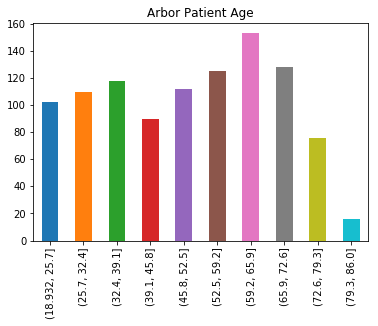

In [20]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='Arbor Patient Age')

In [21]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.93, 25.9]     61
(25.9, 32.8]      89
(32.8, 39.7]      81
(39.7, 46.6]     110
(46.6, 53.5]     128
(53.5, 60.4]     185
(60.4, 67.3]     206
(67.3, 74.2]      79
(74.2, 81.1]      47
(81.1, 88.0]      35
Name: Age(Year), dtype: int64

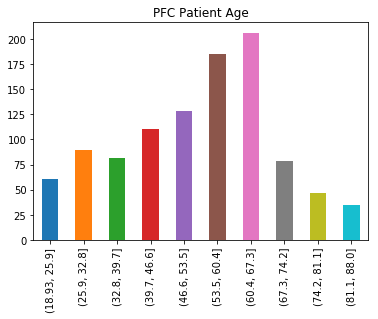

In [22]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='PFC Patient Age')

In [23]:
arbor_visits_clean['Age(Year)'].describe()

count    1030.000000
mean       50.040777
std        17.046278
min        19.000000
25%        36.000000
50%        51.000000
75%        65.000000
max        86.000000
Name: Age(Year), dtype: float64

In [24]:
pfc_visits_clean['Age(Year)'].describe()

count    1021.000000
mean       52.674829
std        16.036113
min        19.000000
25%        41.000000
50%        54.000000
75%        64.000000
max        88.000000
Name: Age(Year), dtype: float64

In [25]:
arbor_visits_clean['PatientId'].describe()

count    1030.000000
mean     5815.876699
std      1159.517135
min       259.000000
25%      5990.000000
50%      6161.000000
75%      6373.000000
max      6603.000000
Name: PatientId, dtype: float64

In [26]:
pfc_visits_clean['PatientId'].describe()

count    1021.000000
mean     5746.238002
std      1262.416677
min       102.000000
25%      5976.000000
50%      6158.000000
75%      6348.000000
max      6592.000000
Name: PatientId, dtype: float64

In [27]:
arbor_visits_clean.groupby(arbor_visits_clean['PatientId']).size().describe()

count    397.000000
mean       2.594458
std        2.071760
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       20.000000
dtype: float64

In [28]:
print arbor_visits_clean.groupby(arbor_visits_clean['PatientId']).size()

PatientId
259     2
434     1
517     1
586     1
616     1
684     1
764     7
1147    4
1177    1
1316    3
1670    6
1785    1
1998    1
2003    1
2004    1
2013    6
2121    2
2311    2
2457    3
2565    7
2840    2
2865    5
2910    2
3000    1
3008    2
3439    1
3449    2
3505    1
3539    1
3546    4
       ..
6556    2
6557    3
6558    1
6559    1
6560    3
6561    2
6567    1
6571    1
6573    1
6574    3
6575    2
6576    1
6577    4
6578    1
6579    1
6580    3
6581    1
6582    2
6583    1
6593    3
6594    1
6595    2
6596    4
6597    1
6598    1
6599    2
6600    1
6601    1
6602    1
6603    1
Length: 397, dtype: int64


In [29]:
pfc_visits_clean.groupby(pfc_visits_clean['PatientId']).size().describe()

count    401.000000
mean       2.546135
std        1.865071
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
dtype: float64

In [57]:
def get_grouped_data(df, column, group_keys=None, summed=True):
    grouped = df.groupby(df[column])
    visits_per_group = [] if group_keys is None else np.zeros(len(group_keys))
    if group_keys is not None:
        for c, group in enumerate(group_keys):
            if group in grouped.groups:
                visits_per_group[c] = len(grouped.groups[group])
    else:
        for group in grouped.groups:
            visits_per_group.append(len(grouped.groups[group]))
        
    if summed:
        return np.sum(visits_per_group)
    else:
        return visits_per_group

In [73]:
def visits_periodic(df, period='mom', group_keys=None):
    
    periodic_visits = []
    time_points = []
    spec_usage_mom = []
    
    if period == 'mom':
        months = [val for val in range(1, 13)]
        years = [2017, 2018]
        for year in years:
            for begin_month in months:
                tp1 = (year, begin_month, 1)
                tp2 = ()
                if begin_month == 12:
                    tp2 = (year+1, 1, 1)
                else:
                    tp2 = (year, begin_month+1, 1)
                    
                filtered = time_filter(tp1,tp2, df)
                
                if filtered.values.shape[0] == 0:
                    continue
                else:
                    periodic_visits.append(get_grouped_data(filtered, 'PatientId'))
                    spec_usage_mom.append(get_grouped_data(filtered, 'VisitType', group_keys = group_keys, summed=False))
                    time_points.append(str(begin_month) + '/' + str(year) + ' - ' + str(begin_month+1) + '/' + str(year))
                    

    return (periodic_visits, np.array(spec_usage_mom), time_points)

In [77]:
arbor_spec_clinics = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'LAB FOLLOW-UP NOTE'
    ]


periodic_visits, spec_usage_mom, time_points = visits_periodic(arbor_visits_clean, 
                                                               group_keys=arbor_spec_clinics)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

arbor_specialty_clinics_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(arbor_spec_clinics, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

arbor_specialty_clinics_df.head(12)


1030
[[  0.   0.   0.  19.   0.   0.   0.   0.   0.  17.]
 [  4.   0.   0.  44.   0.   4.   0.   4.   0.  40.]
 [  0.   0.   0.  31.   0.   0.   1.   2.   1.  30.]
 [  0.   0.   0.   4.   0.   0.   0.   0.   0.  14.]
 [  0.   0.   0.  34.   0.   0.   0.   0.   1.  18.]
 [  0.   0.   0.  25.   0.   0.   0.   0.   0.  10.]
 [  0.   0.   0.  23.   3.   6.   0.   0.   0.  18.]
 [  0.   0.   0.  21.   4.   0.   0.   0.   0.  13.]
 [  3.   0.   0.  36.   0.   0.   0.   0.   0.  18.]
 [  0.   2.   0.  25.   2.   0.   0.   0.   3.  25.]
 [  0.   0.   1.  42.   3.   3.   2.   0.   2.  17.]
 [  3.   1.   2.  50.   0.   3.   0.   5.   0.  28.]]
['6/2017 - 7/2017', '7/2017 - 8/2017', '8/2017 - 9/2017', '9/2017 - 10/2017', '10/2017 - 11/2017', '11/2017 - 12/2017', '12/2017 - 13/2017', '1/2018 - 2/2018', '2/2018 - 3/2018', '3/2018 - 4/2018', '4/2018 - 5/2018', '5/2018 - 6/2018']


,ARBOR CARDIOLOGY,ARBOR DERMATOLOGY,ARBOR FOLLOW-UP VISIT,ARBOR GENERAL VISIT,ARBOR MENTAL HEALTH,ARBOR MSK,ARBOR NEUROLOGY,ARBOR OPHTHALMOLOGY,ARBOR WOMEN'S HEALTH,LAB FOLLOW-UP NOTE
6/2017 - 7/2017,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,17.0
7/2017 - 8/2017,4.0,0.0,0.0,44.0,0.0,4.0,0.0,4.0,0.0,40.0
8/2017 - 9/2017,0.0,0.0,0.0,31.0,0.0,0.0,1.0,2.0,1.0,30.0
9/2017 - 10/2017,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,14.0
10/2017 - 11/2017,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,1.0,18.0
11/2017 - 12/2017,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,10.0
12/2017 - 13/2017,0.0,0.0,0.0,23.0,3.0,6.0,0.0,0.0,0.0,18.0
1/2018 - 2/2018,0.0,0.0,0.0,21.0,4.0,0.0,0.0,0.0,0.0,13.0
2/2018 - 3/2018,3.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,18.0
3/2018 - 4/2018,0.0,2.0,0.0,25.0,2.0,0.0,0.0,0.0,3.0,25.0


In [68]:

for clinic, col_idx in zip(ARBOR_SPEC_CLINICS, range(spec_usage_mom.shape[0])):
    print clinic, col_idx



ARBOR CARDIOLOGY 0
ARBOR DERMATOLOGY 1
ARBOR FOLLOW-UP VISIT 2
ARBOR GENERAL VISIT 3
ARBOR MENTAL HEALTH 4
ARBOR MSK 5
ARBOR NEUROLOGY 6
ARBOR OPHTHALMOLOGY 7
ARBOR WOMEN'S HEALTH 8
LAB FOLLOW-UP NOTE 9


,ARBOR CARDIOLOGY,ARBOR DERMATOLOGY,ARBOR FOLLOW-UP VISIT,ARBOR GENERAL VISIT,ARBOR MENTAL HEALTH,ARBOR MSK,ARBOR NEUROLOGY,ARBOR OPHTHALMOLOGY,ARBOR WOMEN'S HEALTH,LAB FOLLOW-UP NOTE
6/2017 - 7/2017,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,17.0
7/2017 - 8/2017,4.0,0.0,0.0,44.0,0.0,4.0,0.0,4.0,0.0,40.0
8/2017 - 9/2017,0.0,0.0,0.0,31.0,0.0,0.0,1.0,2.0,1.0,30.0
9/2017 - 10/2017,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,14.0
10/2017 - 11/2017,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,1.0,18.0
11/2017 - 12/2017,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,10.0
12/2017 - 13/2017,0.0,0.0,0.0,23.0,3.0,6.0,0.0,0.0,0.0,18.0
1/2018 - 2/2018,0.0,0.0,0.0,21.0,4.0,0.0,0.0,0.0,0.0,13.0
2/2018 - 3/2018,3.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,18.0
3/2018 - 4/2018,0.0,2.0,0.0,25.0,2.0,0.0,0.0,0.0,3.0,25.0


In [33]:
arbor_visits_clean.head(3)

,VisitId,LocationAbbreviation,PatientId,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,,
2017-06-04 09:30:00,16624,AFC,5988,78,ARBOR GENERAL VISIT,M,2017-06-04 09:30:00,2017-06-04 08:33:26
2017-06-04 09:45:00,16626,AFC,5989,75,ARBOR GENERAL VISIT,M,2017-06-04 09:45:00,2017-06-04 08:46:12
2017-06-04 10:00:00,16635,AFC,5990,30,ARBOR GENERAL VISIT,F,2017-06-04 10:00:00,2017-06-04 09:44:53


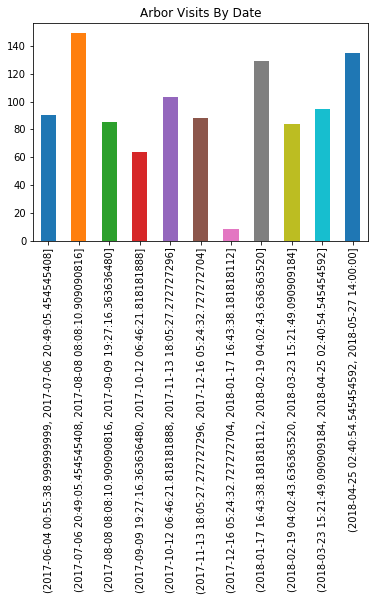

In [34]:
arbor_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=11).plot(kind='bar', title='Arbor Visits By Date')

In [35]:
arbor_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=12)

(2017-06-04 00:55:38.999999999, 2017-07-04 03:52:30]     90
(2017-07-04 03:52:30, 2017-08-02 22:15:00]              130
(2017-08-02 22:15:00, 2017-09-01 16:37:30]               90
(2017-09-01 16:37:30, 2017-10-01 11:00:00]               57
(2017-10-01 11:00:00, 2017-10-31 05:22:30]               89
(2017-10-31 05:22:30, 2017-11-29 23:45:00]               51
(2017-11-29 23:45:00, 2017-12-29 18:07:30]               80
(2017-12-29 18:07:30, 2018-01-28 12:30:00]               55
(2018-01-28 12:30:00, 2018-02-27 06:52:30]               97
(2018-02-27 06:52:30, 2018-03-29 01:15:00]               80
(2018-03-29 01:15:00, 2018-04-27 19:37:30]               76
(2018-04-27 19:37:30, 2018-05-27 14:00:00]              135
Name: VisitDateTimeTS, dtype: int64

In [36]:
pfc_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=12)

(2017-06-03 00:25:38.999999999, 2017-07-03 03:22:30]     94
(2017-07-03 03:22:30, 2017-08-01 21:45:00]              101
(2017-08-01 21:45:00, 2017-08-31 16:07:30]               87
(2017-08-31 16:07:30, 2017-09-30 10:30:00]               88
(2017-09-30 10:30:00, 2017-10-30 04:52:30]              101
(2017-10-30 04:52:30, 2017-11-28 23:15:00]               53
(2017-11-28 23:15:00, 2017-12-28 17:37:30]               52
(2017-12-28 17:37:30, 2018-01-27 12:00:00]               88
(2018-01-27 12:00:00, 2018-02-26 06:22:30]               80
(2018-02-26 06:22:30, 2018-03-28 00:45:00]               97
(2018-03-28 00:45:00, 2018-04-26 19:07:30]               66
(2018-04-26 19:07:30, 2018-05-26 13:30:00]              114
Name: VisitDateTimeTS, dtype: int64

In [78]:
grouped = pfc_visits_clean.groupby('VisitType')
for g in grouped.groups:
    print g
    print len(grouped.groups[g])

ARBOR CARDIOLOGY
2
ARBOR MSK
1
MISC NOTE
98
PFC DERMATOLOGY VISIT
31
ARBOR DERMATOLOGY
1
PFC FOLLOW UP VISIT
310
ADMIN CHART REVIEW NOTE
2
PFC HEP CLINIC VISIT
33
PFC FAST TRACK
25
PFC FAST TRACK VACCINE
27
PFC HEPATITIS VACCINE SCREENING
2
PHONE
3
ARBOR MENTAL HEALTH
3
LAB FOLLOW-UP NOTE
6
PFC WOMEN'S CLINIC VISIT
34
HEALTH EDUCATOR NOTE
66
ARBOR GENERAL VISIT
20
PFC NEW PATIENT VISIT
313
PFC MENTAL HEALTH VISIT
9
PFC OPHTHALMOLOGY VISIT
35


In [47]:
arbor_visits_clean.groupby('VisitType').size()

VisitType
ADMIN CHART REVIEW NOTE             10
ARBOR CARDIOLOGY                    10
ARBOR DERMATOLOGY                    3
ARBOR FAST TRACK TB                  1
ARBOR FAST TRACK VACCINE             1
ARBOR FOLLOW-UP VISIT                3
ARBOR GENERAL VISIT                354
ARBOR MENTAL HEALTH                 12
ARBOR MSK                           16
ARBOR NEUROLOGY                      3
ARBOR OPHTHALMOLOGY                 11
ARBOR WOMEN'S HEALTH                 7
BRIDGE TO CARE NOTE                  2
HEALTH EDUCATOR NOTE                14
LAB FOLLOW-UP NOTE                 248
MISC NOTE                          188
PATIENT NAVIGATOR NOTE             146
PFC HEPATITIS VACCINE SCREENING      1
dtype: int64

In [87]:
df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
df_visits_clean = df_visits[df_visits['Age(Year)']> 18]

In [88]:
df_visits_clean.groupby('VisitType').size()

VisitType
ADMIN CHART REVIEW NOTE             12
ARBOR CARDIOLOGY                    12
ARBOR DERMATOLOGY                    4
ARBOR FAST TRACK TB                  1
ARBOR FAST TRACK VACCINE             1
ARBOR FOLLOW-UP VISIT                3
ARBOR GENERAL VISIT                374
ARBOR MENTAL HEALTH                 15
ARBOR MSK                           17
ARBOR NEUROLOGY                      3
ARBOR OPHTHALMOLOGY                 11
ARBOR WOMEN'S HEALTH                 7
BRIDGE TO CARE NOTE                  2
HEALTH EDUCATOR NOTE                80
LAB FOLLOW-UP NOTE                 254
MISC NOTE                          286
PATIENT NAVIGATOR NOTE             146
PFC DERMATOLOGY VISIT               31
PFC FAST TRACK                      25
PFC FAST TRACK VACCINE              27
PFC FOLLOW UP VISIT                310
PFC HEP CLINIC VISIT                33
PFC HEPATITIS VACCINE SCREENING      3
PFC MENTAL HEALTH VISIT              9
PFC NEW PATIENT VISIT              313
PFC OPHTHALMOLO

In [91]:
ALL_SPEC_KEYS = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'PFC DERMATOLOGY VISIT',
    'PFC FOLLOW UP VISIT',
    'PFC HEP CLINIC VISIT',
    'PFC MENTAL HEALTH VISIT',
    'PFC NEW PATIENT VISIT',
    'PFC OPHTHALMOLOGY VISIT',
    "PFC WOMEN'S CLINIC VISIT",
    'PFC FAST TRACK VACCINE'
]


periodic_visits, spec_usage_mom, time_points = visits_periodic(df_visits_clean, 
                                                               group_keys=ALL_SPEC_KEYS)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

joint_spec_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(ALL_SPEC_KEYS, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

joint_spec_df.head(12)


2051
[[  0.   0.   0.  19.   0.   0.   0.   0.   0.   4.  27.   6.   1.  23.
    0.   3.]
 [  4.   0.   0.  44.   0.   5.   0.   4.   0.   0.  33.   0.   0.  40.
    7.   3.]
 [  0.   0.   0.  31.   0.   0.   1.   2.   1.   7.  34.   0.   0.  18.
    0.   5.]
 [  0.   1.   0.  11.   2.   0.   0.   0.   0.   0.  30.   0.   1.  25.
    6.   2.]
 [  1.   0.   0.  42.   1.   0.   0.   0.   1.   3.  21.   9.   0.  29.
    2.   3.]
 [  0.   0.   0.  25.   0.   0.   0.   0.   0.   0.  16.   0.   2.  13.
    0.   3.]
 [  0.   0.   0.  23.   3.   6.   0.   0.   0.   6.  12.   6.   0.  14.
    2.   0.]
 [  0.   0.   0.  21.   4.   0.   0.   0.   0.   0.  22.   5.   0.  36.
    7.   5.]
 [  3.   0.   0.  36.   0.   0.   0.   0.   0.   6.  28.   0.   2.  16.
    0.   5.]
 [  0.   2.   0.  29.   2.   0.   0.   0.   3.   0.  27.   4.   0.  37.
    5.   0.]
 [  0.   0.   1.  42.   3.   3.   2.   0.   2.   5.  25.   0.   0.  29.
    6.   1.]
 [  4.   1.   2.  51.   0.   3.   0.   5.   0.   0.  35.   3

,ARBOR CARDIOLOGY,ARBOR DERMATOLOGY,ARBOR FOLLOW-UP VISIT,ARBOR GENERAL VISIT,ARBOR MENTAL HEALTH,ARBOR MSK,ARBOR NEUROLOGY,ARBOR OPHTHALMOLOGY,ARBOR WOMEN'S HEALTH,PFC DERMATOLOGY VISIT,PFC FOLLOW UP VISIT,PFC HEP CLINIC VISIT,PFC MENTAL HEALTH VISIT,PFC NEW PATIENT VISIT,PFC OPHTHALMOLOGY VISIT,PFC WOMEN'S CLINIC VISIT
6/2017 - 7/2017,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,4.0,27.0,6.0,1.0,23.0,0.0,3.0
7/2017 - 8/2017,4.0,0.0,0.0,44.0,0.0,5.0,0.0,4.0,0.0,0.0,33.0,0.0,0.0,40.0,7.0,3.0
8/2017 - 9/2017,0.0,0.0,0.0,31.0,0.0,0.0,1.0,2.0,1.0,7.0,34.0,0.0,0.0,18.0,0.0,5.0
9/2017 - 10/2017,0.0,1.0,0.0,11.0,2.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,1.0,25.0,6.0,2.0
10/2017 - 11/2017,1.0,0.0,0.0,42.0,1.0,0.0,0.0,0.0,1.0,3.0,21.0,9.0,0.0,29.0,2.0,3.0
11/2017 - 12/2017,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2.0,13.0,0.0,3.0
12/2017 - 13/2017,0.0,0.0,0.0,23.0,3.0,6.0,0.0,0.0,0.0,6.0,12.0,6.0,0.0,14.0,2.0,0.0
1/2018 - 2/2018,0.0,0.0,0.0,21.0,4.0,0.0,0.0,0.0,0.0,0.0,22.0,5.0,0.0,36.0,7.0,5.0
2/2018 - 3/2018,3.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,28.0,0.0,2.0,16.0,0.0,5.0
3/2018 - 4/2018,0.0,2.0,0.0,29.0,2.0,0.0,0.0,0.0,3.0,0.0,27.0,4.0,0.0,37.0,5.0,0.0


In [92]:
joint_spec_df.to_csv('joint_spec_clinics.csv')